# Explore SpeechBrain: Speaker Recognition and Diarization

This notebook will explore speaker recognition and diarization using the Python library [SpeechBrain](https://speechbrain.github.io/index.html). `SpeechBrain` can be installed with `pip install speechbrain`. To run the notebook for the first time, it must be opened with administrator rights.

In [198]:
""" Explore speechbrain speaker recognition and diarization """
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio
import speechbrain as sb
from IPython.display import Audio
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from speechbrain.pretrained import EncoderClassifier

In [171]:
FILENAME_MULTI = "audio/test_audio_multi.wav"

In [158]:
ecapa = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="./pretrained_models/ecapa")

In [183]:
signal, fs = torchaudio.load(FILENAME_MULTI)

In [80]:
embedding = ecapa.encode_batch(signal)

In [12]:
print(embedding)

tensor([[[ 16.8061,   3.7904, -31.8081,  -3.8996,  21.3604,  -1.4568,  21.9415,
           37.0995,  18.9892,  14.3628,  14.2680,  16.2085,  31.7212, -13.5816,
           -1.8984,  26.9492,  -9.9534,  -3.1682,  -8.5193, -31.8493,   4.6140,
           -9.1199,  14.7259, -19.7288,  -8.9369, -19.0221,  -4.2089,  -1.4919,
           13.5475, -44.4856,   5.1663, -42.9543, -31.1856, -11.2618,   2.7114,
            7.0277,  -8.0202,  -9.4207,   5.6019,  36.6441,   3.9869, -23.2233,
          -37.1789,   2.8674,  21.2129, -36.8399, -10.8587,  -5.7605,  28.5374,
          -25.3712,  14.7203,  -1.8151,  21.4372,  35.9322, -12.7524, -10.0052,
          -17.4756,  26.7686, -16.7406,   7.0297,  47.4100, -18.5490, -39.5590,
           -4.3086,   4.2101,  19.1565,  34.4723, -11.8187,  18.5879, -17.0558,
            6.8274,   3.5517,   0.6956,  -8.8150, -10.8214,   2.3580, -19.3685,
            6.2454,  11.3034,   5.1969,   8.3809,  14.0468,  14.6084,  -7.0446,
          -16.4095, -15.6039, -30.0881, 

In [145]:
ecapa.classify_batch(signal)

(tensor([[ 0.0091, -0.0386,  0.1591,  ..., -0.0717,  0.0323, -0.0811]]),
 tensor([0.2787]),
 tensor([1771]),
 ['id10419'])

In [68]:
signal.shape

torch.Size([1, 1440000])

In [36]:
signal.shape

torch.Size([1, 1440000])

In [184]:
def embedd_signal_batch(signal, batch_size, embedder):
    batches = signal.squeeze().split(batch_size)
    
    embeddings = []
    
    for batch in batches:
        batch_reshaped = batch.reshape(1, batch.shape[0])
        embeddings.append(embedder.encode_batch(batch_reshaped)[0, 0].numpy())
         
    return embeddings

In [185]:
embeddings = embedd_signal_batch(signal, 8000, ecapa)

In [186]:
def calc_principal_components(embeddings, n_components=2):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(np.array(embeddings))
    
    return principal_components

In [187]:
principal_components = calc_principal_components(embeddings)

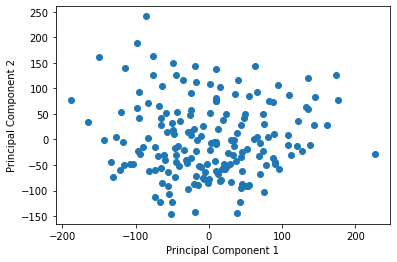

In [188]:
fig, ax = plt.subplots()
ax.scatter(principal_components[:, 0], principal_components[:, 1])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

In [189]:
kmeans = SpectralClustering(3)
predictions = kmeans.fit(embeddings)

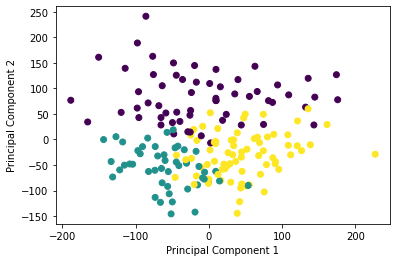

In [190]:
fig, ax = plt.subplots()
ax.scatter(principal_components[:, 0], principal_components[:, 1], c=predictions.labels_)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

In [122]:
def classify_signal_batch(signal, batch_size, classifier):
    batches = signal.squeeze().split(batch_size)
    
    predictions = []
    
    for batch in batches:
        batch_reshaped = batch.reshape(1, batch.shape[0])
        predictions.append(classifier.classify_batch(batch_reshaped)[3][0])
    
    return predictions

In [123]:
predictions = classify_signal_batch(signal, 8000, ecapa)

In [134]:
print(set(predictions))

{'id08068', 'id08783', 'id08122', 'id00902', 'id00732', 'id03748', 'id00818', 'id01160', 'id05985', 'id08710', 'id06280', 'id02017', 'id08331', 'id04489', 'id07801', 'id07647', 'id04894', 'id06133', 'id10944', 'id11210', 'id05694', 'id05121', 'id04525', 'id01058', 'id06481', 'id01735', 'id08106', 'id00981', 'id06990', 'id08323', 'id07719', 'id06867', 'id07682', 'id06131', 'id10022', 'id07775', 'id03292', 'id07928', 'id06617', 'id10858', 'id11101', 'id01605', 'id03326', 'id10361', 'id08160', 'id08739', 'id06553', 'id00051', 'id01969', 'id04508', 'id06972', 'id00775', 'id07097', 'id03902', 'id02157', 'id06723', 'id04491', 'id02260', 'id07776', 'id06500', 'id04116', 'id01960', 'id08358', 'id05693', 'id04199', 'id04192', 'id03483', 'id03868', 'id04606', 'id02684', 'id08624', 'id07517', 'id11087', 'id10941', 'id10419', 'id04842', 'id09016', 'id03436', 'id03147', 'id05135', 'id08114', 'id00028', 'id02395', 'id02496', 'id06183', 'id09040', 'id07392', 'id06333', 'id01063', 'id06267', 'id07809'

In [152]:
ecapa.mods.keys()

odict_keys(['compute_features', 'mean_var_norm', 'embedding_model', 'mean_var_norm_emb', 'classifier'])

In [153]:
class ClassifierFineTune(sb.Brain):

    def on_stage_start(self, stage, epoch):
        if stage == sb.Stage.TRAIN:
            for module in [self.modules.classifier]:
                for p in module.parameters():
                    p.requires_grad = True
                    
    def compute_forward(self, batch, stage):
        """Runs all the computation of that transforms the input into the
        output probabilities over the N classes.
        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        predictions : Tensor
            Tensor that contains the posterior probabilities over the N classes.
        """

        # We first move the batch to the appropriate device.
        batch = batch.to(self.device)

        # Compute features, embeddings, and predictions
        feats, lens = self.prepare_features(batch.sig, stage)
        embeddings = self.modules.embedding_model(feats, lens)
        predictions = self.modules.classifier(embeddings)

        return predictions
    
    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.
        Arguments
        ---------
        predictions : tensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """

        _, lens = batch.sig
        spkid, _ = batch.spk_id_encoded

        # Concatenate labels (due to data augmentation)
        if stage == sb.Stage.TRAIN and hasattr(self.modules, "env_corrupt"):
            spkid = torch.cat([spkid, spkid], dim=0)
            lens = torch.cat([lens, lens])

        # Compute the cost function
        loss = sb.nnet.losses.nll_loss(predictions, spkid, lens)

        # Append this batch of losses to the loss metric for easy
        self.loss_metric.append(
            batch.id, predictions, spkid, lens, reduction="batch"
        )

        # Compute classification error at test time
        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, spkid, lens)

        return loss
    
    def fit_batch(self, batch):
        """Train the parameters given a single batch in input"""
        predictions = self.compute_forward(batch, sb.Stage.TRAIN)
        loss = self.compute_objectives(predictions, batch, sb.Stage.TRAIN)
        loss.backward()
        if self.check_gradients(loss):
            self.optimizer.step()
        self.optimizer.zero_grad()
        return loss.detach()

In [156]:
modules = {
    "compute_features": ecapa.mods.compute_features,
    "mean_var_norm": ecapa.mods.mean_var_norm,
    "embedding_model": ecapa.mods.embedding_model,
    "mean_var_norm_emb": ecapa.mods.mean_var_norm_emb,
    "classifier": ecapa.mods.classifier
}

brain = ClassifierFineTune(modules)

In [157]:
brain